In [1]:
from nnAnnotator import sample
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('metadata/all_year_counts.csv', index_col=0)
df['photos_count']

1850      22
1851      20
1852      22
1853      45
1854     221
        ... 
1946    5945
1947    4188
1948    4282
1949    6015
1950    5630
Name: photos_count, Length: 101, dtype: int64

<AxesSubplot:>

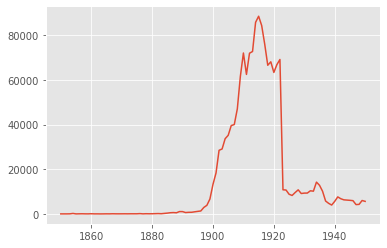

In [4]:
df['photos_count'].plot()

In [5]:
sampler = sample.nnSampler()

In [6]:
df_photos_sample = sampler.create_sample(sample_size=2000, kind='photos', start_year=1895, end_year=1920, step=1, year_sample=False)

In [14]:
#Path('ph/photos').mkdir(parents=True)

In [12]:
#df_photos_sample.to_json('ph/photos/df_1895_1920_sample.json')
df = pd.read_json('ph/photos/df_1895_1920_sample.json')

In [13]:
df_photos_sample

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url
0,cohi_fairplay_ver01/data/sn90051265/0038334096...,1895-04-11,346,1,cohi_fairplay_ver01,sn90051265,"[0.17975157037977094, 0.3125392689424403, 0.42...",0.904487,"[J., D., Moore,, of, Brighton,, Arapahoe, year...","Rocky Ford, Colo.",[Colorado--Otero--Rocky Ford],Rocky Ford enterprise.,Enterprise Pub. Co.,https://news-navigator.labs.loc.gov/data/cohi_...,https://chroniclingamerica.loc.gov/data/batche...
1,curiv_ogilby_ver01/data/sn85042461/00280769599...,1895-02-17,627,1,curiv_ogilby_ver01,sn85042461,"[0.5321751113765496, 0.2450136508244494, 0.925...",0.984921,[],Los Angeles [Calif.],[California--Los Angeles--Los Angeles],The herald. [volume],Ayers & Lynch,https://news-navigator.labs.loc.gov/data/curiv...,https://chroniclingamerica.loc.gov/data/batche...
2,vi_yes_ver01/data/sn84025841/00175032290/18950...,1895-04-20,342,1,vi_yes_ver01,sn84025841,"[0.022615497841208244, 0.3880815556738801, 0.1...",0.951469,"[lomas, H., Parker,, mik, (ioLo, nmi'K]","Richmond, Va.",[Virginia--Richmond],Richmond planet. [volume],Planet Pub. Co.,https://news-navigator.labs.loc.gov/data/vi_ye...,https://chroniclingamerica.loc.gov/data/batche...
3,khi_jennison_ver01/data/sn82014635/00280760535...,1895-10-06,6,1,khi_jennison_ver01,sn82014635,"[0.8119376124446964, 0.43632238993807415, 0.94...",0.935179,"[tsEl, Everybody, are, Invited, to, call, a,t,...","Wichita, Kan.",[Kansas--Sedgwick--Wichita],The Wichita daily eagle. [volume],M.M. Murdock & R.P. Murdock,https://news-navigator.labs.loc.gov/data/khi_j...,https://chroniclingamerica.loc.gov/data/batche...
4,iune_bravo_ver01/data/sn84025828/00294555705/1...,1895-10-12,1064,1,iune_bravo_ver01,sn84025828,"[0.2924637945529023, 0.21018060209787437, 0.68...",0.976895,"[Minor, '1, nfMrrTT'l, ', BF"", ', ., -slv0fo-?...","Chicago, Ill.",[Illinois--Cook County--Chicago],Chicago eagle. [volume],Henry F. Donovan,https://news-navigator.labs.loc.gov/data/iune_...,https://chroniclingamerica.loc.gov/data/batche...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,dlc_englishsetter_ver01/data/sn83045433/002807...,1920-01-11,146,1,dlc_englishsetter_ver01,sn83045433,"[0.37828196649966034, 0.0216876816168064, 0.62...",0.971464,"[|, (, }, ?, ?, ', j, ., j, S, j, 1, <, 1, ., ...","Washington, D.C.",[District of Columbia--Washington],The Washington herald. [volume],Washington Herald Co.,https://news-navigator.labs.loc.gov/data/dlc_e...,https://chroniclingamerica.loc.gov/data/batche...
1998,nmu_dumas_ver01/data/sn84031081/0041562668A/19...,1920-03-28,807,1,nmu_dumas_ver01,sn84031081,"[0.2683137830176865, 0.07784404807086388, 0.51...",0.970253,"[Gosh!, Broadway, Chorus, Girls, Have, to, Sho...","Albuquerque, N.M.",[New Mexico--Bernalillo--Albuquerque],Albuquerque morning journal. [volume],Democrat Pub. Co.,https://news-navigator.labs.loc.gov/data/nmu_d...,https://chroniclingamerica.loc.gov/data/batche...
1999,tu_anita_ver01/data/sn85038531/00415621243/192...,1920-01-21,252,1,tu_anita_ver01,sn85038531,"[0.8180684014968785, 0.07300100441044437, 0.95...",0.913365,"[S., R,, Underwood]","Chattanooga, Tenn.",[Tennessee--Hamilton--Chattanooga],The Chattanooga news. [volume],News Pub. Co.,https://news-navigator.labs.loc.gov/data/tu_an...,https://chroniclingamerica.loc.gov/data/batche...
2000,oru_cooper_ver01/data/sn88086023/0029586882A/1...,1920-03-12,263,1,oru_cooper_ver01,sn88086023,"[0.3299404363981716, 0.7077518234973439, 0.707...",0.966266,"[UPHOLDS, WAR, ON, PROFITEERING, LANDLORDS, '""...","Pendleton, OR",[Oregon--Umatilla--Pendleton],East Oregonian : E.O.,East Oregonian Pub. Co.,https://news-navigator.labs.loc.gov/data/oru_c...,https://chroniclingamerica.loc.gov/data/batche...


In [11]:
df_photos_sample['name'].value_counts()

New-York tribune. [volume]                207
Evening star. [volume]                     73
The Washington times. [volume]             63
Omaha daily bee.                           57
The Seattle star.                          42
                                         ... 
Roanoke Rapids herald. [volume]             1
Richmond daily palladium. [volume]          1
Republican news item. [volume]              1
The Republican journal. [volume]            1
Zgoda : Wydania dla niewiast. [volume]      1
Name: name, Length: 454, dtype: int64

## Download sample 

make dir 

In [15]:
sampler.download_sample('ph/photos/images', df=df_photos_sample)

In [ ]:
cd

label-studio start multi_label --init --label-config config.xml --input-path=images --input-format=image-dir --allow-serving-local-files

## Process annotations 

In [1]:
from nnAnnotator import annotate

In [31]:
df = annotate.process_completions('data/ph/photos/multi_label/','label')

In [32]:
df

,created_at,id,lead_time,result,data,skipped,was_cancelled
0,1596460221,3721001,8.940,human|landscape,vi_yes_ver01_data_sn84025841_00175032307_18970...,NaN,NaN
1,1595871874,2833001,5.735,human,dlc_frontier_ver01_data_sn84026749_00280764346...,NaN,NaN
2,1596117853,3371001,3.537,human,wa_dogwood_ver01_data_sn88085187_00211108150_1...,NaN,NaN
3,1596055149,2999001,10.048,human,hihouml_cardinal_ver01_data_sn83025121_0029455...,NaN,NaN
4,1595623605,2130001,2.283,human,ct_cedar_ver01_data_sn84020358_00271744456_190...,NaN,NaN
...,...,...,...,...,...,...,...
2064,1596485994,3923001,5.074,human|human-structure,ak_jellymoss_ver01_data_sn84020657_0027952701A...,NaN,NaN
2065,1595624413,2261001,3.233,human,njr_cinnamon_ver03_data_sn85035720_00279529571...,NaN,NaN
2066,1596482553,3889001,4.312,human,dlc_liberia_ver01_data_sn83030214_00175041394_...,NaN,NaN
2067,1596055490,3020001,47.347,human,uuml_dantley_ver01_data_sn85058130_206534618_1...,NaN,NaN


In [33]:
annotate.export_annotations(df, 'data/ph/photos/multi_label.csv')

In [10]:
#

In [ ]:
# upload

In [ ]:
# other dataset 

In [53]:
df_photos_sample_1920 = sample.create_sample(sample_size=500, kind='photos', start_year=1920, end_year=1930, step=1, year_sample=False)

In [55]:
df_photos_sample_1920

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url
0,nmu_dumas_ver01/data/sn84031081/00415626708/19...,1920-07-07,63,1,nmu_dumas_ver01,sn84031081,"[0.26652543851644683, 0.09647806144999502, 0.3...",0.9365375638008118,[v],"Albuquerque, N.M.",[New Mexico--Bernalillo--Albuquerque],Albuquerque morning journal. [volume],Democrat Pub. Co.,https://news-navigator.labs.loc.gov/data/nmu_d...,https://chroniclingamerica.loc.gov/data/batche...
1,deu_ironhill_ver01/data/sn85042354/00383342727...,1920-10-08,34,1,deu_ironhill_ver01,sn85042354,"[0.3874816197782891, 0.043533436776950984, 0.6...",0.9594363570213318,"[Louise, Huff,, the, Famous, Actress,, Tells, ...","Wilmington, Del.",[Delaware--New Castle--Wilmington],Evening journal. [volume],J. Milton Davidson,https://news-navigator.labs.loc.gov/data/deu_i...,https://chroniclingamerica.loc.gov/data/batche...
2,txdn_hungary_ver01/data/sn88084272/00294553812...,1920-11-24,174,1,txdn_hungary_ver01,sn88084272,"[0.25641121138831885, 0.729342609296295, 0.607...",0.9376397132873535,"[Calumus, And, All, Star, Bliss, Team, Clash, ...","El Paso, Tex.",[Texas--El Paso--El Paso],El Paso herald.,Herald News Co.,https://news-navigator.labs.loc.gov/data/txdn_...,https://chroniclingamerica.loc.gov/data/batche...
3,okhi_hughes_ver01/data/sn85042345/00237284616/...,1920-11-21,1154,1,okhi_hughes_ver01,sn85042345,"[0.4847379521082453, 0.045229909034573905, 0.7...",0.9315388798713684,"[Lots, of, Luck, in, Mexico,, Car, Mires, in, ...","Tulsa, Okla.",[Oklahoma--Tulsa--Tulsa],The Morning Tulsa daily world. [volume],World Pub. Co.,https://news-navigator.labs.loc.gov/data/okhi_...,https://chroniclingamerica.loc.gov/data/batche...
4,wa_bainbridge_ver01/data/sn87093407/0020029086...,1920-11-29,692,1,wa_bainbridge_ver01,sn87093407,"[0.14534541150453256, 0.03853915078299386, 0.3...",0.9275697469711304,"[What, Makes, Genius?, *, *, *, *, *, *, **#, ...","Seattle, Wash.",[Washington--King--Seattle],The Seattle star.,E.H. Wells & Co.,https://news-navigator.labs.loc.gov/data/wa_ba...,https://chroniclingamerica.loc.gov/data/batche...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,vi_jumboshrimp_ver01/data/sn84025841/004142165...,1930-11-22,590,1,vi_jumboshrimp_ver01,sn84025841,"[0.038856259601390684, 0.27932895418880094, 0....",0.9495421051979065,"[The, home, of, the, Clay, family., Pretty, Be...","Richmond, Va.",[Virginia--Richmond],Richmond planet. [volume],Planet Pub. Co.,https://news-navigator.labs.loc.gov/data/vi_ju...,https://chroniclingamerica.loc.gov/data/batche...
491,dlc_noone_ver01/data/sn83045462/00280600283/19...,1930-03-17,631,1,dlc_noone_ver01,sn83045462,"[0.4921744814209661, 0.03733812651176045, 0.61...",0.9247048497200012,"[j, I, I, |, i, j, ', ;, ', j, Dies, in, Revol...","Washington, D.C.",[District of Columbia--Washington],Evening star. [volume],W.D. Wallach & Hope,https://news-navigator.labs.loc.gov/data/dlc_n...,https://chroniclingamerica.loc.gov/data/batche...
492,in_goldman_ver01/data/sn82015313/0038334928A/1...,1930-09-10,210,1,in_goldman_ver01,sn82015313,"[0.14905654820692787, 0.7523051864979853, 0.26...",0.9074618220329285,"[RUSH, CAPTAIN, ', lUi, laP'':, JH|, pr, \, %,...",Indianapolis [Ind.],[Indiana--Marion--Indianapolis],The Indianapolis times. [volume],Indianapolis Daily Times Co.,https://news-navigator.labs.loc.gov/data/in_go...,https://chroniclingamerica.loc.gov/data/batche...
493,dlc_noone_ver01/data/sn83045462/00280600702/19...,1930-05-01,89,1,dlc_noone_ver01,sn83045462,"[0.2661505436551744, 0.04634078074309785, 0.38...",0.9237460494041443,"[., j, Queen, of, the, May, m, BmAav*"", 1, —, ...","Washington, D.C.",[District of Columbia--Washington],Evening star. [volume],W.D. Wallach & Hope,https://news-navigator.labs.loc.gov/data/dlc_n...,https://chroniclingamerica.loc.gov/data/batche...


In [62]:
df_photos_sample_1920_1930 = sample.create_sample(sample_size=2000, kind='photos', start_year=1920, end_year=1940, step=1, year_sample=False)

In [63]:
sample.download_sample('data/ph/photos/1920_40', existing_df=df_photos_sample_1920_1930)

In [65]:
df_photos_sample_1920_1930.to_json('data/ph/photos/1920_40.json')